<a href="https://colab.research.google.com/github/Ellen-Tuane/INPE_CAP417_Computational_Statistics/blob/main/CAP417_Hands_on_10_PSD_DFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 417 - PARTE C - HANDS-ON 03

Alternativa: Incorporar aqui o módulo de geração de ST 1/f do Hands-On2

Caracterização Espectral de Processos Estocásticos (PSD + DFA  e  MFSS)

ESCREVA O SEU NOME AQUI: ELLEN TUANE

E,
ANTES DE ENVIAR AO PROFESSOR, SALVE ESTE COLAB ATUALIZANDO-O COM O SEU PRIMEIRO NOME. OU SEJA:  CAP417HandsOn3SeuNome.ipynb

prazo de Entrega: 06/6/2022

================================================================================


# Step 1 (CARACTERIZACAO VIA ESPECTRO DE POTÊNCIAS - PSD E DFA): 

Dataframe 1.a. - Série de vento solar com 4096 pontos enviada pelo professor como dataset teste (Sw4096.csv).

Dataframe 1.b. - baixar serie temporal recomendada pelo professor via e-mail.

Aplicar na série 1.b. - o algoritmo **specplus.py** (calcula espectros PSD e DFA). **Antes porém**, para se familiarizar com ambos, rode os algoritmos sobre a série de teste 1.c, Sw4096.csv, enviada pelo email.  

Note que, a versão do 1o algoritmo **specplus.py** se aplica apenas em dados no formato .txt. Dessa forma, está incluido um modulo em python para transformar o arquivo .txt em . csv. (módulo que pode ser útil em futuras aplicações). 

Aplique ambos os algorítmos sobre o Dataframe 1.b. Salve o output. Você pode modificar o código **specplus.py** para ler diretamente o formato .csv (isso vale um bonus de 0.1 na nota final da parte C). 




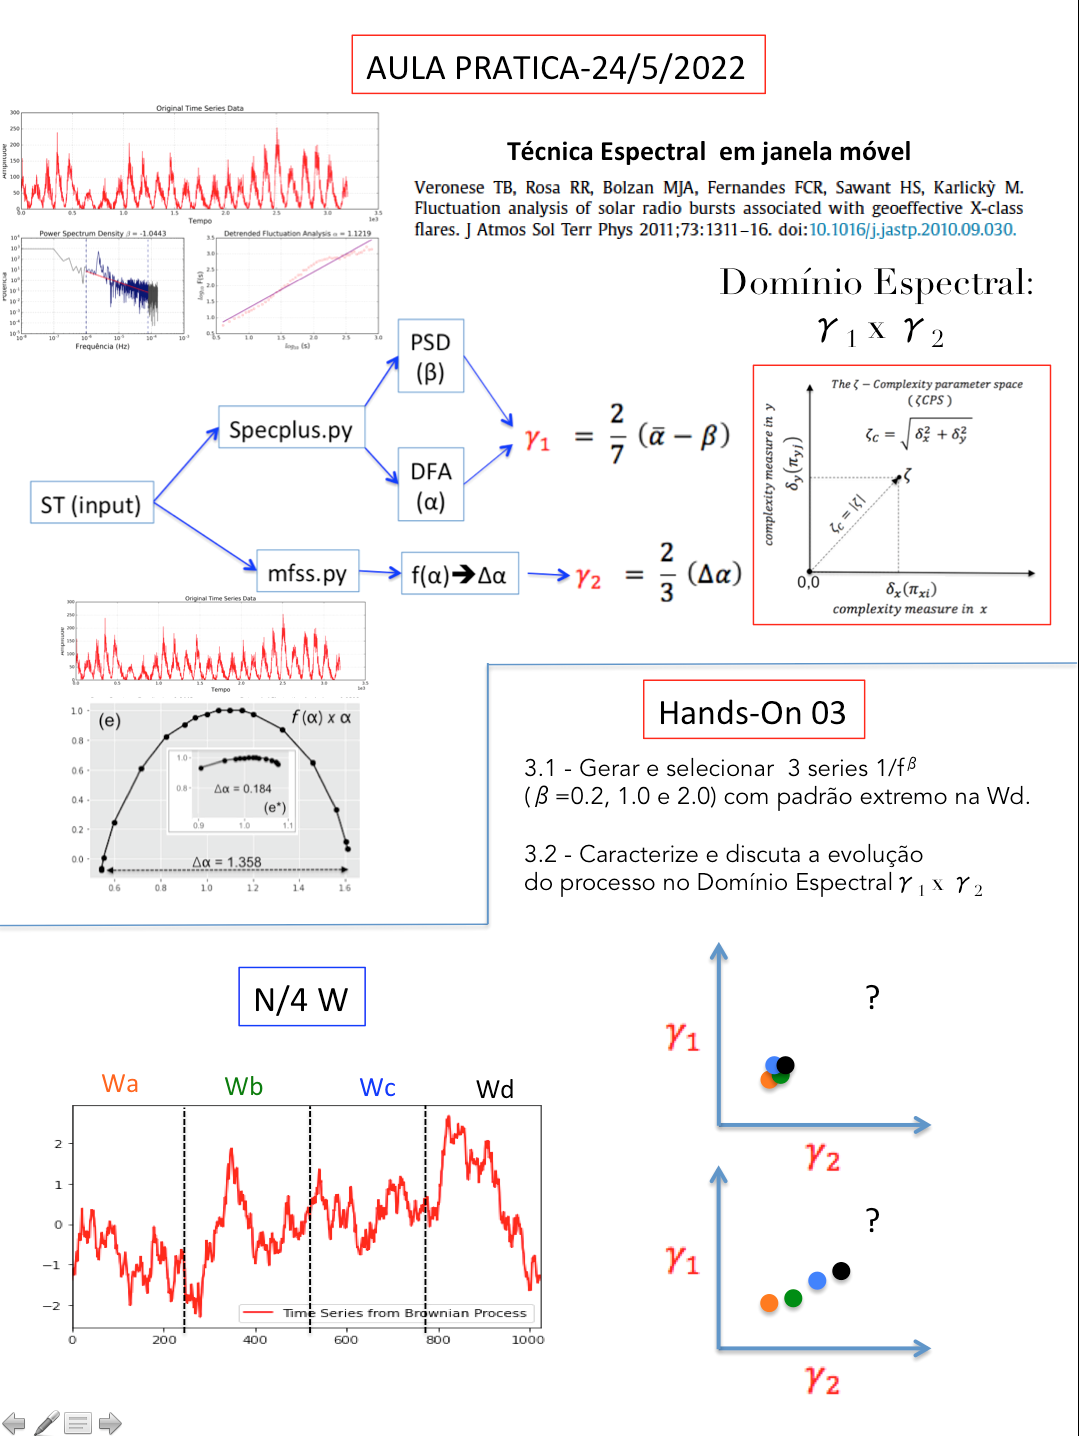

## Bibliotecas e Comandos Necessários:

In [ ]:
!pip install colorednoise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import io
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import colorednoise as cn
from scipy import stats, optimize
import numpy as np
import math

# Geral 3 series 1/f ^b

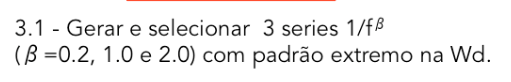

O colorenoise é um típico gerador de ruído baseado na distribuição Gaussiana com lei de potencia. 

Ref.: Timmer, J. and Koenig, M.: On generating power law noise. Astron. Astrophys. 300, 707-710 (1995)

________________________________________________________________


O Processo Browniano é um tipo de ruído da família 1/fˆ(beta)("Flicker Noise"), quando beta=2. 

Quando beta=0 caracteriza o ruído branco (White Noise) e beta=1 o ruído rosa (Pink Noise), por isso, o beta=2, é também conhecido como ruído Browniano ou ruído vermelho (Red Noise).
Note que o termo "Browniano" não tem relação com a cor "Marrom", mas sim com o nome do seu descobridor, o botânico Robert Brown "

Fonte: Hands on 2 parte C

In [ ]:
def normalizeSerie(s):
    serie = s.copy()
    serie = serie-np.average(serie)
    serie = serie/np.std(serie)
    return serie

Gerar as series temporais com β= 0.2, 1 e 2

In [ ]:
beta = 0.2
dataSize = 2**10
serie_b_02 = cn.powerlaw_psd_gaussian(beta,dataSize)
serie_b_02 = normalizeSerie(serie_b_02)

beta = 1
dataSize = 2**10
serie_b_1 = cn.powerlaw_psd_gaussian(beta,dataSize)
serie_b_1 = normalizeSerie(serie_b_1)

beta = 2
dataSize = 2**10
serie_b_2 = cn.powerlaw_psd_gaussian(beta,dataSize)
serie_b_2 = normalizeSerie(serie_b_2)

series = []
series.append(serie_b_02)
series.append(serie_b_1)
series.append(serie_b_2)

Plotar series criadas

In [ ]:
def plotSeries(series):
    #set b legend
    b = ["0.2", "1", "2"]

    #set colors
    c = ["b", "m", "r"]

    for i in range(len(series)):
        # set position on the fig
        plt.subplot(3,3,(i+1))

        # set data
        plt.plot(series[i], color=c[i])

        # set title
        plt.title('Noise for β = '+ b[i])
        plt.xlabel('time steps')
        plt.ylabel('Amplitude')

        #Set bottom and left spines as x and y axes of coordinate system
        plt.gca().spines['left'].set_position('zero')
        plt.gca().set_xlim(0, 1000)

    return

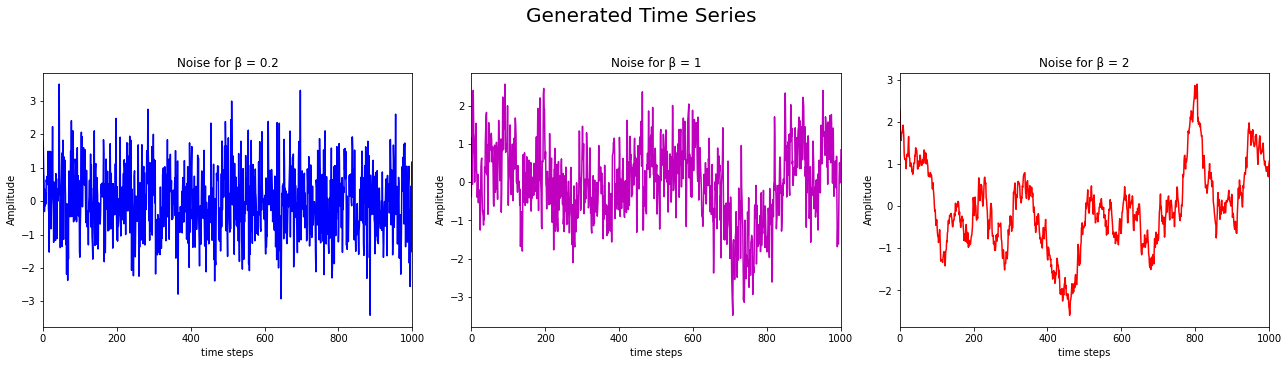

In [ ]:
fig, axs = plt.subplots(figsize=(18,13))
plotSeries(series)

fig.suptitle("Generated Time Series ", size=20)

fig.tight_layout()
fig.subplots_adjust(top=0.91)

plt.show()

# Obtem os espectros PSD (power spctrum density) e DFA (dentreded fluctuation analysis) para uma série temporal com $2ˆ{n}$ pontos.

SPECPLUS.PY (processamento de apenas 01 módulo google colab para obter o output).




In [ ]:
series_alfa = []
series_beta = []


Data Analysis for 3DBMO simulations...

Original time series data (1024 points): 

First 10 points: [ 1.82239599  1.60626292  0.82851019  0.53987791 -0.31171713  0.35473935
 -0.14456546  0.24631669 -0.088687    0.63797811]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


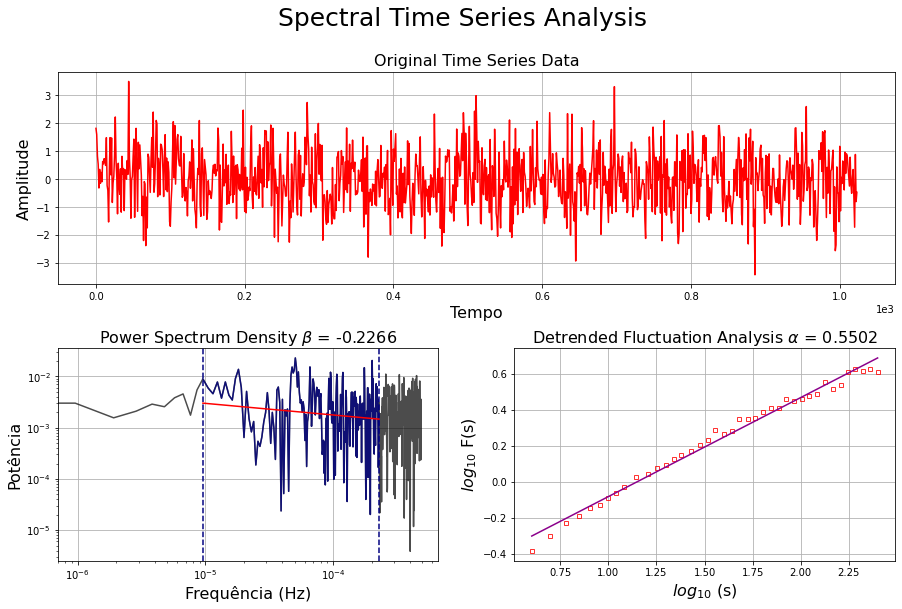


Data Analysis for 3DBMO simulations...

Original time series data (1024 points): 

First 10 points: [-3.78718177e-01  1.15856638e+00  1.03225486e+00 -5.59014167e-02
  1.62845048e+00  2.39785066e+00  1.72243109e+00  8.43234152e-01
  7.27747662e-01  7.33370936e-04]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


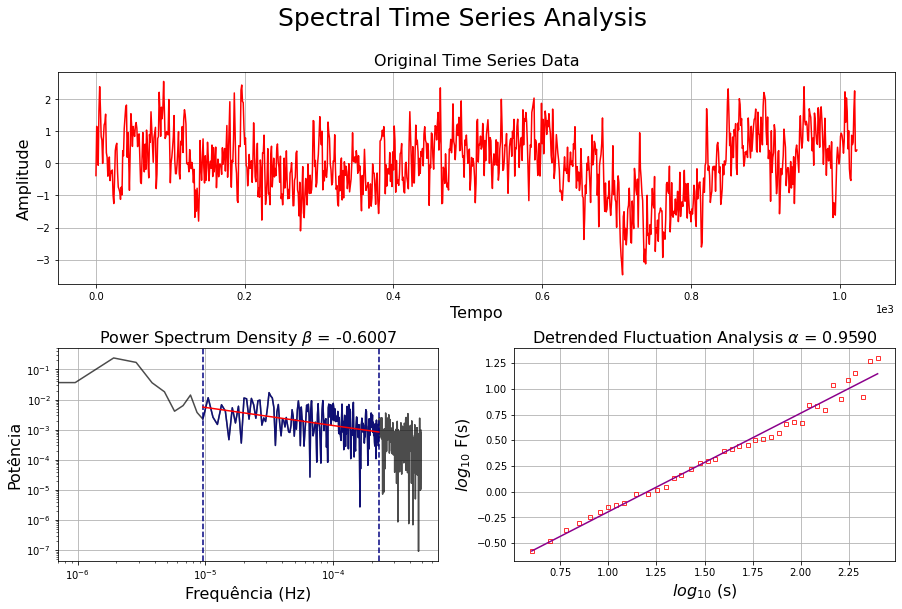


Data Analysis for 3DBMO simulations...

Original time series data (1024 points): 

First 10 points: [2.29838613 2.17624105 1.7125623  1.59400223 1.55604168 1.73765732
 1.73800772 1.77466563 1.81527125 1.91757847]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


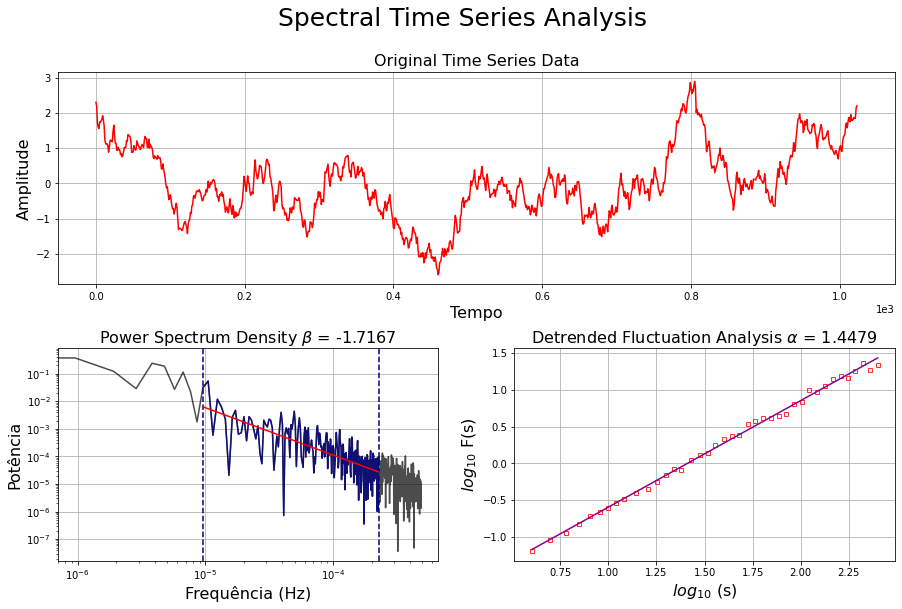

In [ ]:
# ------------------------------------------------------------------------
# SpecplusV01.py
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats, optimize
import numpy as np
import math

__author__ = 'Paulo Giovani'
__copyright__ = 'Copyright 2017, 3DBMO Project INPE'
__credits__ = ['Paulo Giovani', 'Reinaldo Roberto Rosa', 'Murilo da Silva Dantas']
__license__ = 'GPL'
__version__ = '0.1B'
__maintainer__ = 'Paulo Giovani'
__email__ = 'pg_faria@yahoo.com.br'

#---------------------------------------------------------------------
# Calcula o PSD da série temporal
#---------------------------------------------------------------------

for dx in series:
        def psd(data):
          """Calcula o PSD de uma série temporal."""
          
          # Define um intervalo para realizar o ajuste da reta
          INICIO = 10
          FIM = 240
          
          # O vetor com o tempo é o tamanho do número de pontos
          N = len(data)
          tempo = np.arange(len(data))

          # Define a frequência de amostragem
          dt = (tempo[-1] - tempo[0] / (N - 1))
          fs = 1 / dt

          # Calcula o PSD utilizando o MLAB
          power, freqs = mlab.psd(data, Fs = fs, NFFT = N, scale_by_freq = False)

          # Calcula a porcentagem de pontos utilizados na reta de ajuste
          totalFrequencias = len(freqs)
          totalPSD = FIM - INICIO
          porcentagemPSD = int(100 * totalPSD / totalFrequencias)

          # Seleciona os dados dentro do intervalo de seleção
          xdata = freqs[INICIO:FIM]
          ydata = power[INICIO:FIM]

          # Simula o erro
          yerr = 0.2 * ydata

          # Define uma função para calcular a Lei de Potência
          powerlaw = lambda x, amp, index: amp * (x**index)

          # Converte os dados para o formato LOG
          logx = np.log10(xdata)
          logy = np.log10(ydata)

          # Define a função para realizar o ajuste
          fitfunc = lambda p, x: p[0] + p[1] * x
          errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err    
          logyerr = yerr / ydata

          # Calcula a reta de ajuste
          pinit = [1.0, -1.0]
          out = optimize.leastsq(errfunc, pinit, args = (logx, logy, logyerr), full_output = 1)    
          pfinal = out[0]
          covar = out[1]
          
          index = pfinal[1]
          amp = 10.0 ** pfinal[0]
          indexErr = np.sqrt(covar[0][0])
          ampErr = np.sqrt(covar[1][1]) * amp
          
          # Retorna os valores obtidos
          return freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM
          
        #---------------------------------------------------------------------
        # Calcula o DFA 1D da série temporal
        #---------------------------------------------------------------------
        def dfa1d(timeSeries, grau):
          """Calcula o DFA 1D (adaptado de Physionet), onde a escala cresce
          de acordo com a variável 'Boxratio'. Retorna o array 'vetoutput', 
          onde a primeira coluna é o log da escala S e a segunda coluna é o
          log da função de flutuação."""

          # 1. A série temporal {Xk} com k = 1, ..., N é integrada na chamada função perfil Y(k)
          x = np.mean(timeSeries)
          timeSeries = timeSeries - x
          yk = np.cumsum(timeSeries)
          tam = len(timeSeries)

          # 2. A série (ou perfil) Y(k) é dividida em N intervalos não sobrepostos de tamanho S
          sf = np.ceil(tam / 4).astype(np.int)
          boxratio = np.power(2.0, 1.0 / 8.0)
          vetoutput = np.zeros(shape = (1,2))

          s = 4
          while s <= sf:        
            serie = yk        
            if np.mod(tam, s) != 0:
              l = s * int(np.trunc(tam/s))
              serie = yk[0:l]			
            t = np.arange(s, len(serie), s)
            v = np.array(np.array_split(serie, t))
            l = len(v)
            x = np.arange(1, s + 1)
            
            # 3. Calcula-se a variância para cada segmento v = 1,…, n_s:
            p = np.polynomial.polynomial.polyfit(x, v.T, grau)
            yfit = np.polynomial.polynomial.polyval(x, p)
            vetvar = np.var(v - yfit)
            
            # 4. Calcula-se a função de flutuação DFA como a média das variâncias de cada intervalo
            fs = np.sqrt(np.mean(vetvar))
            vetoutput = np.vstack((vetoutput,[s, fs]))
            
            # A escala S cresce numa série geométrica
            s = np.ceil(s * boxratio).astype(np.int)

          # Array com o log da escala S e o log da função de flutuação   
          vetoutput = np.log10(vetoutput[1::1,:])

          # Separa as colunas do vetor 'vetoutput'
          x = vetoutput[:,0]
          y = vetoutput[:,1]

          # Regressão linear
          slope, intercept, _, _, _ = stats.linregress(x, y)

          # Calcula a reta de inclinação
          predict_y = intercept + slope * x

          # Calcula o erro
          pred_error = y - predict_y

          # Retorna o valor do ALFA, o vetor 'vetoutput', os vetores X e Y,
          # o vetor com os valores da reta de inclinação e o vetor de erros
          return slope, vetoutput, x, y, predict_y, pred_error

        #---------------------------------------------------------------------
        # Trecho principal
        #---------------------------------------------------------------------
        def main():
          """Função com o código princiapl do programa."""
          
          print("\nData Analysis for 3DBMO simulations...\n")
          
          # Desabilita as mensagens de erro do Numpy (warnings)
          old_settings = np.seterr(divide = 'ignore', invalid = 'ignore', over = 'ignore')
          
          # Carrega o arquivo de dados
          nomeArquivo = 'Japan_new_cases.csv'		
        #	data = np.genfromtxt(nomeArquivo,
        #                        delimiter = ',',
        #                        dtype = 'float32',
          #                       filling_values = 0)

          data = dx
          
          # Exibe os primeiro N valores do arquivo
          N = 10
          print("Original time series data (%d points): \n" %(len(data)))
          print("First %d points: %s\n" %(N, data[0:10]))
          print()
          
          #-----------------------------------------------------------------
            # Parâmetros gerais de plotagem
            #-----------------------------------------------------------------
          
          # Define os subplots
          fig = plt.figure()
          fig.subplots_adjust(hspace = .3, wspace = .2)
          
          # Tamanho das fontes
          tamanhoFonteEixoX = 16
          tamanhoFonteEixoY = 16
          tamanhoFonteTitulo = 16
          tamanhoFontePrincipal = 25
          
          # Título principal
          tituloPrincipal = 'Spectral Time Series Analysis' 	
          
          #-----------------------------------------------------------------
            # Plotagem da série original
            #-----------------------------------------------------------------
          
          # Define as cores da plotagem
          corSerieOriginal = 'r'
          
          # Título dos eixos da série original
          textoEixoX = 'Tempo'
          textoEixoY = 'Amplitude'
          textoTituloOriginal = 'Original Time Series Data'
          
          print("1. Plotting time series data...")
          
          # Plotagem da série de dados    
          #O = fig.add_subplot(1, 3, 1)    
          O = fig.add_subplot(2, 1, 1)
          O.plot(data, '-', color = corSerieOriginal)
          O.set_title(textoTituloOriginal, fontsize = tamanhoFonteTitulo)
          O.set_xlabel(textoEixoX, fontsize = tamanhoFonteEixoX)
          O.set_ylabel(textoEixoY, fontsize = tamanhoFonteEixoY)
          O.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
          O.grid()
          
          #-----------------------------------------------------------------
            # Cálculo e plotagem do PSD
            #-----------------------------------------------------------------
          
          # Calcula o PSD
          freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM = psd(data)
         


          # O valor do beta equivale ao index
          b = index

           ##### Appending beta to a variable ##########
          series_beta.append(b)

          # Define as cores da plotagem
          corPSD1 = 'k'
          corPSD2 = 'navy'

          # Título dos eixos do PSD
          textoPSDX = 'Frequência (Hz)'
          textoPSDY = 'Potência'
          textoTituloPSD = r'Power Spectrum Density $\beta$ = '
          
          print("2. Plotting Power Spectrum Density...")

          # Plotagem do PSD    
          PSD = fig.add_subplot(2, 2, 3)    
          PSD.plot(freqs, power, '-', color = corPSD1, alpha = 0.7)
          PSD.plot(xdata, ydata, color = corPSD2, alpha = 0.8)
          PSD.axvline(freqs[INICIO], color = corPSD2, linestyle = '--')
          PSD.axvline(freqs[FIM], color = corPSD2, linestyle = '--')    
          PSD.plot(xdata, powerlaw(xdata, amp, index), 'r-', linewidth = 1.5, label = '$%.4f$' %(b))    
          PSD.set_xlabel(textoPSDX, fontsize = tamanhoFonteEixoX)
          PSD.set_ylabel(textoPSDY, fontsize = tamanhoFonteEixoY)
          PSD.set_title(textoTituloPSD + '%.4f' %(b), loc = 'center', fontsize = tamanhoFonteTitulo)
          PSD.set_yscale('log')
          PSD.set_xscale('log')
          PSD.grid() 
          
          #-----------------------------------------------------------------
          # Cálculo e plotagem do DFA
            #-----------------------------------------------------------------
                  
          # Calcula o DFA 1D
          alfa, vetoutput, x, y, reta, erro = dfa1d(data, 1)

          ##### Appending alfa to a variable ##########
          series_alfa.append(alfa)

          # Verifica se o DFA possui um valor válido
          # Em caso afirmativo, faz a plotagem
          if not math.isnan(alfa):
            
            # Define as cores da plotagem
            corDFA = 'darkmagenta'

            # Título dos eixos do DFA
            textoDFAX = '$log_{10}$ (s)'
            textoDFAY = '$log_{10}$ F(s)'
            textoTituloDFA = r'Detrended Fluctuation Analysis $\alpha$ = '
            
            print("3. Plotting Detrended Fluctuation Analysis...")
            
            # Plotagem do DFA 
            DFA = fig.add_subplot(2, 2, 4)    
            DFA.plot(x, y, 's', 
                color = corDFA, 
                markersize = 4,
                markeredgecolor = 'r',
                markerfacecolor = 'None',
                alpha = 0.8)				 
            DFA.plot(x, reta, '-', color = corDFA, linewidth = 1.5)
            DFA.set_title(textoTituloDFA + '%.4f' %(alfa), loc = 'center', fontsize = tamanhoFonteTitulo)
            DFA.set_xlabel(textoDFAX, fontsize = tamanhoFonteEixoX)
            DFA.set_ylabel(textoDFAY, fontsize = tamanhoFonteEixoY)
            DFA.grid()

          else:  
            DFA = fig.add_subplot(2, 2, 4)
            DFA.set_title(textoTituloDFA + 'N.A.', loc = 'center', fontsize = tamanhoFonteTitulo)
            DFA.grid()

          #-----------------------------------------------------------------
          # Exibe e salva a figura
          #-----------------------------------------------------------------
          plt.suptitle(tituloPrincipal, fontsize = tamanhoFontePrincipal)
          nomeImagem = '3DBMO_PSD_DFA_2.png'
          fig.set_size_inches(15, 9)
          plt.savefig(nomeImagem, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)	
          plt.show()
            
        #---------------------------------------------------------------------
        # Trecho principal
        #---------------------------------------------------------------------
        if __name__ == "__main__":
          main()

# Task 01: Calcular Gamma1

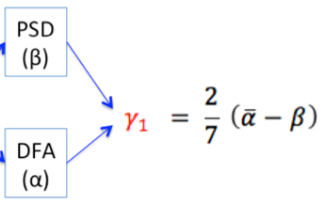

In [ ]:
def y1(alfa, beta):
    return 2/7*(alfa - beta)

In [ ]:
# Beta from PDS function and alfa from DFA function

gamma1 = []

b = ["0.2", "1", "2"]
for i in range(len(series_beta)):
    print(f"Beta {b[i]} -- β = {round(series_beta[i],4)}")
    print(f"Beta {b[i]} -- α = {round(series_alfa[i],4)}")
    print(f"Beta {b[i]} -- γ1 = {round(y1(series_alfa[i], series_beta[i]),4)}\n")
    gamma1.append(y1(series_alfa[i], series_beta[i]))

Beta 0.2 -- β = -0.2266
Beta 0.2 -- α = 0.5502
Beta 0.2 -- γ1 = 0.2219

Beta 1 -- β = -0.6007
Beta 1 -- α = 0.959
Beta 1 -- γ1 = 0.4456

Beta 2 -- β = -1.7167
Beta 2 -- α = 1.4479
Beta 2 -- γ1 = 0.9042



In [ ]:
gamma1

[0.22191746073613583, 0.4456420495635823, 0.9041773463653069]

# STEP 02:
CARACTERIZAÇÃO VIA ESPECTRO MULTIFRACTAL

Algoritmo MFDFA.py (com 5 módulos separados) para obtenção do espectro multifractal de singularidade (deve ser aplicado sobre o formato .csv).

Para fins de familiarização, rode o algoritmo primeiramente sobre o dataframe 1 e obtenha o valor de Delta_Alpha=dalpha) ~  0.87.

Aplique sobre o dataframe 1.b e obtenha o valor de dalpha. Compare com o dalpha aplicado sobre o dataframe 1.a e verifique qual tem maior multifractalidade (maior dalpha).


# Multifractal Singularity Spectra (MFSS) 

via MFDFA.py (Módulos A, B, C, D e E)



## MFSS-MÓDULO A 

In [ ]:
#MFDFA-Analytics-by-SKDataScience
#multifractal DFA singularity spectra - module A
#Version 3.0 - Modified by R.R.Rosa - Dec 2018 - mfdfa_ss_m1.py
# This code implements a modification of the first-order unifractal analysis algorithm originally described in [1].
# It covers both the detrended fluctuation analysis (DFA) and the Hurst (a.k.a. R/S) analysis methods. For more details
# on the DFA and Hurst analysis methods, please refer to [2, 3].
#
# At the input, 'dx' is a time series of increments of the physical observable 'x(t)', of the length equal to an
# integer power of two greater than two (i.e. 4, 8, 16, 32, etc.), 'normType_p' is any real greater than or
# equal to one specifying the p-norm, 'isDFA' is a boolean value prescribing to use either the DFA-based algorithm or
# the standard Hurst (a.k.a. R/S) analysis, 'normType_q' is any real greater than or equal to one specifying the q-norm.
#
# At the output, 'timeMeasure' is the time measure of the data's support at different scales, 'meanDataMeasure' is
# the data measure at different scales, while 'scales' is the scales at which the data measure is computed.
#
# The conventional way of using the output values is to plot the data measure vs the scales; the time measure,
# being the inverse quantity to the scales, is computed for an alternative representation and may be ignored.
#
# The requirement to have a power-of-two data length is aimed at avoiding inaccuracies when computing the data measure
# on different time scales.
#
# REFERENCES:
# [1] D.M. Filatov, J. Stat. Phys., 165 (2016) 681-692. DOI: 10.1007/s10955-016-1641-6.
# [2] J.W. Kantelhardt, Fractal and Multifractal Time Series, available at http://arxiv.org/abs/0804.0747, 2008.
# [3] J. Feder, Fractals, Plenum Press, New York, 1988.
#
# The end user is granted perpetual permission to reproduce, adapt, and/or distribute this code, provided that
# an appropriate link is given to the original repository it was downloaded from.

#input: read your time series as a 1d vector, with size 2ˆn, named:  dx

import numpy as np

def getHurstByUpscaling(dx, normType_p = np.inf, isDFA = 1, normType_q = 1.0):
    ## Some initialiation
    dx_len = len(dx)

    # We have to reserve the most major scale for shifts, so we divide the data
    # length by two. (As a result, the time measure starts from 2.0, not from
    # 1.0, see below.)
    dx_len = np.int(dx_len / 2)

    dx_shift = np.int(dx_len / 2)

    nScales = np.int(np.round(np.log2(dx_len)))    # Number of scales involved. P.S. We use 'round()' to prevent possible malcomputing of the logarithms
    j = 2 ** (np.arange(1, nScales + 1) - 1) - 1

    meanDataMeasure = np.zeros(nScales)

    ## Computing the data measure
    for ji in range(1, nScales + 1):
        # At the scale 'j(ji)' we deal with '2 * (j(ji) + 1)' elements of the data 'dx'
        dx_k_len = 2 * (j[ji - 1] + 1)
        n = np.int(dx_len / dx_k_len)

        dx_leftShift = np.int(dx_k_len / 2)
        dx_rightShift = np.int(dx_k_len / 2)

        for k in range(1, n + 1):
            # We get a portion of the data of the length '2 * (j(ji) + 1)' plus the data from the left and right boundaries
            dx_k_withShifts = dx[(k - 1) * dx_k_len + 1 + dx_shift - dx_leftShift - 1 : k * dx_k_len + dx_shift + dx_rightShift]

            # Then we perform free upscaling and, using the above-selected data (provided at the scale j = 0),
            # compute the velocities at the scale 'j(ji)'
            j_dx = np.convolve(dx_k_withShifts, np.ones(dx_rightShift), 'valid')

            # Then we compute the accelerations at the scale 'j(ji) + 1'
            r = (j_dx[1 + dx_rightShift - 1 : ] - j_dx[1 - 1 : -dx_rightShift]) / 2.0

            # Finally, we compute the range ...
            if (normType_p == 0):
                R = np.max(r[2 - 1 : ]) - np.min(r[2 - 1 : ])
            elif (np.isinf(normType_p)):
                R = np.max(np.abs(r[2 - 1 : ]))
            else:
                R = (np.sum(r[2 - 1 : ] ** normType_p) / len(r[2 - 1 : ])) ** (1.0 / normType_p)
            # ... and the normalisation factor ("standard deviation")
            S = np.sqrt(np.sum(np.abs(np.diff(r)) ** 2.0) / (len(r) - 1))
            if (isDFA == 1):
                S = 1.0

            meanDataMeasure[ji - 1] += (R / S) ** normType_q
        meanDataMeasure[ji - 1] = (meanDataMeasure[ji - 1] / n) ** (1.0 / normType_q)

    # We pass from the scales ('j') to the time measure; the time measure at the scale j(nScales) (the most major one)
    # is assumed to be 2.0, while it is growing when the scale is tending to j(1) (the most minor one).
    # (The scale j(nScales)'s time measure is NOT equal to 1.0, because we reserved the highest scale for shifts
    # in the very beginning of the function.)
    timeMeasure = 2.0 * dx_len / (2 * (j + 1))

    scales = j + 1

    return [timeMeasure, meanDataMeasure, scales]

# MFSS-MÓDULO B

In [ ]:
#MFDFA-Analytics-by-SKDataScience
#multifractal DFA singularity spectra - module B
#Version 3.0 - Modified by R.R.Rosa - Dec 2018 - mfdfa_ss_m2.py
# This code implements a modification of the first-order multifractal analysis algorithm. It is based on the
# corresponding unifractal analysis technique described in [1]. It computes the Lipschitz-Holder multifractal
# singularity spectrum, as well as the minimum and maximum generalised Hurst exponents [2, 3].
#
# At the input, 'dx' is a time series of increments of the physical observable 'x(t)', of the length equal to an
# integer power of two greater than two (i.e. 4, 8, 16, 32, etc.), 'normType' is any real greater than or
# equal to one specifying the p-norm, 'isDFA' is a boolean value prescribing to use either the DFA-based algorithm or
# the standard Hurst (a.k.a. R/S) analysis, 'isNormalised' is a boolean value prescribing either to normalise the
# intermediate range-to-deviation (R/S) expression or to proceed computing without normalisation.
#
# At the output, 'timeMeasure' is the time measure of the data's support at different scales, 'dataMeasure' is
# the data measure at different scales computed for each value of the variable q-norm, 'scales' is the scales at which
# the data measure is computed, 'stats' is the structure containing MF-DFA statistics, while 'q' is the values of the
# q-norm used.
#
# Similarly to unifractal analysis (see getHurstByUpscaling()), the time measure is computed merely for an alternative
# representation of the dependence 'dataMeasure(q, scales) ~ scales ^ -tau(q)'.
#
# REFERENCES:
# [1] D.M. Filatov, J. Stat. Phys., 165 (2016) 681-692. DOI: 10.1007/s10955-016-1641-6.
# [2] J.W. Kantelhardt, Fractal and Multifractal Time Series, available at http://arxiv.org/abs/0804.0747, 2008.
# [3] J. Feder, Fractals, Plenum Press, New York, 1988.
#
# The end user is granted perpetual permission to reproduce, adapt, and/or distribute this code, provided that
# an appropriate link is given to the original repository it was downloaded from.

import numpy as np

def getMSSByUpscaling(dx, normType = np.inf, isDFA = 1, isNormalised = 1):
    ## Some initialiation
    aux_eps = np.finfo(float).eps

    # We prepare an array of values of the variable q-norm
    aux = [-16.0, -8.0, -4.0, -2.0, -1.0, -0.5, -0.0001, 0.0, 0.0001, 0.5, 0.9999, 1.0, 1.0001, 2.0, 4.0, 8.0, 16.0, 32.0]
    nq = len(aux)

    q = np.zeros((nq, 1))
    q[:, 1 - 1] = aux

    dx_len = len(dx)

    # We have to reserve the most major scale for shifts, so we divide the data
    # length by two. (As a result, the time measure starts from 2.0, not from
    # 1.0, see below.)
    dx_len = np.int(dx_len / 2)

    dx_shift = np.int(dx_len / 2)

    nScales = np.int(np.round(np.log2(dx_len)))    # Number of scales involved. P.S. We use 'round()' to prevent possible malcomputing of the logarithms
    j = 2 ** (np.arange(1, nScales + 1) - 1) - 1

    dataMeasure = np.zeros((nq, nScales))

    ## Computing the data measures in different q-norms
    for ji in range(1, nScales + 1):
        # At the scale 'j(ji)' we deal with '2 * (j(ji) + 1)' elements of the data 'dx'
        dx_k_len = 2 * (j[ji - 1] + 1)
        n = np.int(dx_len / dx_k_len)

        dx_leftShift = np.int(dx_k_len / 2)
        dx_rightShift = np.int(dx_k_len / 2)

        R = np.zeros(n)
        S = np.ones(n)
        for k in range(1, n + 1):
            # We get a portion of the data of the length '2 * (j(ji) + 1)' plus the data from the left and right boundaries
            dx_k_withShifts = dx[(k - 1) * dx_k_len + 1 + dx_shift - dx_leftShift - 1 : k * dx_k_len + dx_shift + dx_rightShift]

            # Then we perform free upscaling and, using the above-selected data (provided at the scale j = 0),
            # compute the velocities at the scale 'j(ji)'
            j_dx = np.convolve(dx_k_withShifts, np.ones(dx_rightShift), 'valid')

            # Then we compute the accelerations at the scale 'j(ji) + 1'
            r = (j_dx[1 + dx_rightShift - 1 : ] - j_dx[1 - 1 : -dx_rightShift]) / 2.0

            # Finally we compute the range ...
            if (normType == 0):
                R[k - 1] = np.max(r[2 - 1 : ]) - np.min(r[2 - 1 : ])
            elif (np.isinf(normType)):
                R[k - 1] = np.max(np.abs(r[2 - 1 : ]))
            else:
                R[k - 1] = (np.sum(r[2 - 1 : ] ** normType) / len(r[2 - 1 : ])) ** (1.0 / normType)
            # ... and the normalisation factor ("standard deviation")
            if (isDFA == 0):
                S[k - 1] = np.sqrt(np.sum(np.abs(np.diff(r)) ** 2.0) / (len(r) - 1))

        if (isNormalised == 1):      # Then we either normalise the R / S values, treating them as probabilities ...
            p = np.divide(R, S) / np.sum(np.divide(R, S))
        else:                        # ... or leave them unnormalised ...
            p = np.divide(R, S)
        # ... and compute the measures in the q-norms
        for k in range(1, n + 1):
            # This 'if' is needed to prevent measure blow-ups with negative values of 'q' when the probability is close to zero
            if (p[k - 1] < 1000.0 * aux_eps):
                continue

            dataMeasure[:, ji - 1] = dataMeasure[:, ji - 1] + np.power(p[k - 1], q[:, 1 - 1])

    # We pass from the scales ('j') to the time measure; the time measure at the scale j(nScales) (the most major one)
    # is assumed to be 2.0, while it is growing when the scale is tending to j(1) (the most minor one).
    # (The scale j(nScales)'s time measure is NOT equal to 1.0, because we reserved the highest scale for shifts
    # in the very beginning of the function.)
    timeMeasure = 2.0 * dx_len / (2 * (j + 1))

    scales = j + 1

    ## Determining the exponents 'tau' from 'dataMeasure(q, timeMeasure) ~ timeMeasure ^ tau(q)'
    tau = np.zeros((nq, 1))
    log10tm = np.log10(timeMeasure)
    log10dm = np.log10(dataMeasure)
    log10tm_mean = np.mean(log10tm)

    # For each value of the q-norm we compute the mean 'tau' over all the scales
    for qi in range(1, nq + 1):
        tau[qi - 1, 1 - 1] = np.sum(np.multiply(log10tm, (log10dm[qi - 1, :] - np.mean(log10dm[qi - 1, :])))) / np.sum(np.multiply(log10tm, (log10tm - log10tm_mean)))

    ## Finally, we only have to pass from 'tau(q)' to its conjugate function 'f(alpha)'
    # In doing so, first we find the Lipschitz-Holder exponents 'alpha' (represented by the variable 'LH') ...
    aux_top = (tau[2 - 1] - tau[1 - 1]) / (q[2 - 1] - q[1 - 1])
    aux_middle = np.divide(tau[3 - 1 : , 1 - 1] - tau[1 - 1 : -1 - 1, 1 - 1], q[3 - 1 : , 1 - 1] - q[1 - 1 : -1 - 1, 1 - 1])
    aux_bottom = (tau[-1] - tau[-1 - 1]) / (q[-1] - q[-1 - 1])
    LH = np.zeros((nq, 1))
    LH[:, 1 - 1] = -np.concatenate((aux_top, aux_middle, aux_bottom))
    # ... and then compute the conjugate function 'f(alpha)' itself
    f = np.multiply(LH, q) + tau

    ## The last preparations
    # We determine the minimum and maximum values of 'alpha' ...
    LH_min = LH[-1, 1 - 1]
    LH_max = LH[1 - 1, 1 - 1]
    # ... and find the minimum and maximum values of another multifractal characteristic, the so-called
    # generalised Hurst (or DFA) exponent 'h'. (These parameters are computed according to [2, p. 27].)
    h_min = -(1.0 + tau[-1, 1 - 1]) / q[-1, 1 - 1]
    h_max = -(1.0 + tau[1 - 1, 1 - 1]) / q[1 - 1, 1 - 1]

    stats = {'tau':       tau,
             'LH':        LH,
             'f':         f,
             'LH_min':    LH_min,
             'LH_max':    LH_max,
             'h_min':     h_min,
             'h_max':     h_max}

    return [timeMeasure, dataMeasure, scales, stats, q]

# MFSS-MÓDULO C 

In [ ]:
#MFDFA-Analytics-by-SKDataScience
#multifractal DFA singularity spectra - module D
#Version 3.0 - Modified by R.R.Rosa - Dec 2018 - mfdfa_ss_m3.py
# This function determines the optimal linear approximations of the data measure using two segments and returns
# the index of the corresponding boundary scale (a.k.a. crossover), the boundary scale itself, as well as the
# unifractal characteristics at the major and minor scales. For examples of using crossovers, see [1, 2].
#
# At the input, 'timeMeasure' is a time measure at different scales, while 'dataMeasure' is a data measure at the same
# scales.
#
# At the output, 'bScale' is the boundary scale, or crossover, separating the major and minor scales, 'bDM' is the
# data measure at the boundary scale, 'bsIndex' is the crossover's index with respect to the time measure, 'HMajor' is
# the unifractal dimension at the major scales, 'HMinor' is the unifractal dimension at the minor scales.
#
# REFERENCES:
# [1] D.M. Filatov, J. Stat. Phys., 165 (2016) 681-692. DOI: 10.1007/s10955-016-1641-6.
# [2] C.-K. Peng, S. Havlin, H.E. Stanley and A.L. Goldberger, Chaos, 5 (1995) 82–87. DOI: 10.1063/1.166141.
#
# The end user is granted perpetual permission to reproduce, adapt, and/or distribute this code, provided that
# an appropriate link is given to the original repository it was downloaded from.

import numpy as np

def getScalingExponents(timeMeasure, dataMeasure):
    ## Initialisation
    nScales = len(timeMeasure)

    log10tm = np.log10(timeMeasure)
    log10dm = np.log10(dataMeasure)

    res = 1.0e+07
    bsIndex = nScales

    ## Computing
    # We find linear approximations for major and minor subsets of the data measure and determine the index of the
    # boundary scale at which the approximations are optimal in the sense of best fitting to the data measure
    for i in range(3, nScales - 2 + 1):
        # Major 'i' scales are approximated by the function 'k * x + b' ...
        curr_log10tm = log10tm[nScales - i + 1 - 1 : nScales]
        curr_log10dm = log10dm[nScales - i + 1 - 1 : nScales]
        detA = i * np.sum(curr_log10tm ** 2.0) - np.sum(curr_log10tm) ** 2.0
        detK = i * np.sum(np.multiply(curr_log10tm, curr_log10dm)) - np.sum(curr_log10tm) * np.sum(curr_log10dm)
        detB = np.sum(curr_log10dm) * np.sum(curr_log10tm ** 2.0) - np.sum(curr_log10tm) * np.sum(np.multiply(curr_log10tm, curr_log10dm))
        k = detK / detA
        b = detB / detA
        # ... and the maximum residual is computed
        resMajor = max(np.abs(k * curr_log10tm + b - curr_log10dm))

        # Minor 'nScales - i + 1' scales are approximated by the function 'k * x + b' ...
        curr_log10tm = log10tm[1 - 1 : nScales - i + 1]
        curr_log10dm = log10dm[1 - 1 : nScales - i + 1]
        detA = (nScales - i + 1) * np.sum(curr_log10tm ** 2.0) - np.sum(curr_log10tm) ** 2.0
        detK = (nScales - i + 1) * np.sum(np.multiply(curr_log10tm, curr_log10dm)) - np.sum(curr_log10tm) * np.sum(curr_log10dm)
        detB = np.sum(curr_log10dm) * np.sum(curr_log10tm ** 2.0) - np.sum(curr_log10tm) * np.sum(np.multiply(curr_log10tm, curr_log10dm))
        k = detK / detA
        b = detB / detA
        # ... and the maximum residual is computed
        resMinor = max(np.abs(k * curr_log10tm + b - curr_log10dm))

        if (resMajor ** 2.0 + resMinor ** 2.0 < res):
            res = resMajor ** 2.0 + resMinor ** 2.0
            bsIndex = i

    # Now we determine the boundary scale and the boundary scale's data measure, ...
    bScale = 2.0 * timeMeasure[1 - 1] / timeMeasure[nScales - bsIndex + 1 - 1] / 2.0
    bDM = dataMeasure[nScales - bsIndex + 1 - 1]
    # ... as well as compute the unifractal dimensions using the boundary scale's index:
    # at the major 'bsIndex' scales ...
    curr_log10tm = log10tm[nScales - bsIndex + 1 - 1 : nScales]
    curr_log10dm = log10dm[nScales - bsIndex + 1 - 1 : nScales]
    detA = bsIndex * np.sum(curr_log10tm ** 2.0) - np.sum(curr_log10tm) ** 2.0
    detK = bsIndex * np.sum(np.multiply(curr_log10tm, curr_log10dm)) - np.sum(curr_log10tm) * np.sum(curr_log10dm)
    DMajor = detK / detA
    HMajor = -DMajor
    # ... and at the minor 'nScales - bsIndex + 1' scales
    curr_log10tm = log10tm[1 - 1 : nScales - bsIndex + 1]
    curr_log10dm = log10dm[1 - 1 : nScales - bsIndex + 1]
    detA = (nScales - bsIndex + 1) * np.sum(curr_log10tm ** 2.0) - np.sum(curr_log10tm) ** 2.0
    detK = (nScales - bsIndex + 1) * np.sum(np.multiply(curr_log10tm, curr_log10dm)) - np.sum(curr_log10tm) * np.sum(curr_log10dm)
    DMinor = detK / detA
    HMinor = -DMinor

    return [bScale, bDM, bsIndex, HMajor, HMinor]

# MFSS-MÓDULO D 

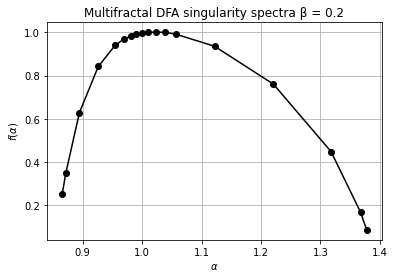

alpha_min = 0.865755, alpha_max = 1.37783, dalpha = 0.512077
h_min = 0.82656, h_max = 1.44574, dh = 0.619182



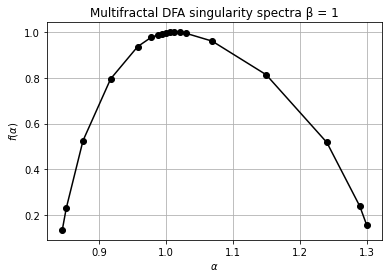

alpha_min = 0.84487, alpha_max = 1.30002, dalpha = 0.455145
h_min = 0.809408, h_max = 1.37229, dh = 0.562885



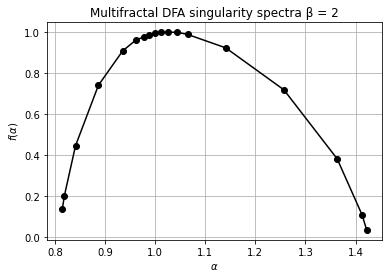

alpha_min = 0.814869, alpha_max = 1.42223, dalpha = 0.607358
h_min = 0.779366, h_max = 1.48697, dh = 0.707607

3


In [ ]:
#MFDFA-Analytics-by-SKDataScience
#multifractal DFA singularity spectra - module D
#Version 3.0 - Modified by R.R.Rosa - Dec 2018 - mfdfa_ss_m4.py
#This module is the entry point for testing the modified first-order uni- and multifractal DFA methods.
#The initial dataset is a time series of size 2ˆn (tseries.txt) 

import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Loading data
#dx = loadtxt('tseries.txt')
#size=8192
#dx = dx[1 - 1 : 8192]               # We take the first 8192 samples

## Computing
# Modified first-order DFA
dx_list = series
b = ["0.2", "1", "2"]

for dx in range(len(dx_list)):
    [timeMeasure, meanDataMeasure, scales] = getHurstByUpscaling(dx_list[dx])                    # Set of parameters No. 1
#[timeMeasure, meanDataMeasure, scales] = getHurstByUpscaling(dx, 3.0, 0, 2.0)       # Set of parameters No. 2

    [bScale, bDM, bsIndex, HMajor, HMinor] = getScalingExponents(timeMeasure, meanDataMeasure)

# Modified first-order MF-DFA
    [_, dataMeasure, _, stats, q] = getMSSByUpscaling(dx_list[dx], isNormalised = 1)

#plt.subplot(2, 1, 2)
    plt.plot(stats['LH'], stats['f'], 'ko-')
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$f(\alpha)$')
    plt.grid('on', which = 'major')
    plt.title('Multifractal DFA singularity spectra β = '+ b[dx])

    plt.show()

#PRINTING SPECTRUM PARAMETERS
    print('alpha_min = %g, alpha_max = %g, dalpha = %g' % (stats['LH_min'], stats['LH_max'], stats['LH_max'] - stats['LH_min']))
    print('h_min = %g, h_max = %g, dh = %g\n' % (stats['h_min'], stats['h_max'], stats['h_max'] - stats['h_min']))

################################################################################################################################
dalpha_list=[]
for dx in series:
    [timeMeasure, meanDataMeasure, scales] = getHurstByUpscaling(dx)                    # Set of parameters No. 1
#[timeMeasure, meanDataMeasure, scales] = getHurstByUpscaling(dx, 3.0, 0, 2.0)       # Set of parameters No. 2

    [bScale, bDM, bsIndex, HMajor, HMinor] = getScalingExponents(timeMeasure, meanDataMeasure)

# Modified first-order MF-DFA
    [_, dataMeasure, _, stats, q] = getMSSByUpscaling(dx, isNormalised = 1)
    dalpha_list.append(stats['LH_max'] - stats['LH_min'])
    

print(len(dalpha_list))

# Task 02: Calcular Gamma2

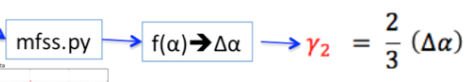

In [ ]:
def y2(a):
    return 2/3*(a)

In [ ]:
dalpha_list

[0.5120772860810491, 0.45514533764486853, 0.6073581349405446]

In [ ]:
gamma2 = []

b = ["0.2", "1", "2"]
for i in range(len(dalpha_list)):
    print(f"Beta {b[i]} -- Δα = {round(dalpha_list[i],4)}")
    print(f"Beta {b[i]} -- γ2 = {round(y2(dalpha_list[i]),4)}\n")
    gamma2.append(y2(dalpha_list[i]))

Beta 0.2 -- Δα = 0.5121
Beta 0.2 -- γ2 = 0.3414

Beta 1 -- Δα = 0.4551
Beta 1 -- γ2 = 0.3034

Beta 2 -- Δα = 0.6074
Beta 2 -- γ2 = 0.4049



# Task 3:

Janelamento + plotagem gamma 1 x gamma 2.

# Plotagem gamma 1 x gamma2



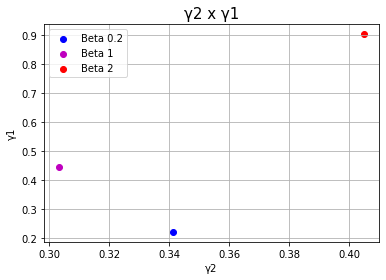

In [ ]:
#set b legend
b = ["0.2", "1", "2"]

#set colors
c = ["b", "m", "r"]

for i in range(len(gamma2)):
    plt.scatter(gamma2[i],gamma1[i],label='Beta '+b[i],color=c[i])
plt.legend()
plt.grid()
plt.xlabel('γ2')
plt.ylabel('γ1')
plt.title('γ2 x γ1',size=15)
plt.show()

# Funtions α, β and Δα



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats, optimize
import numpy as np
import math

In [ ]:
def psd(data):
    """Calcula o PSD de uma série temporal."""
    
    # Define um intervalo para realizar o ajuste da reta
    INICIO = 10
    FIM = 240
    
    # O vetor com o tempo é o tamanho do número de pontos
    N = len(data)
    tempo = np.arange(len(data))

    # Define a frequência de amostragem
    dt = (tempo[-1] - tempo[0] / (N - 1))
    fs = 1 / dt

    # Calcula o PSD utilizando o MLAB
    power, freqs = mlab.psd(data, Fs = fs, NFFT = N, scale_by_freq = False)

    # Calcula a porcentagem de pontos utilizados na reta de ajuste
    totalFrequencias = len(freqs)
    totalPSD = FIM - INICIO
    porcentagemPSD = int(100 * totalPSD / totalFrequencias)

    # Seleciona os dados dentro do intervalo de seleção
    xdata = freqs[INICIO:FIM]
    ydata = power[INICIO:FIM]

    # Simula o erro
    yerr = 0.2 * ydata

    # Define uma função para calcular a Lei de Potência
    powerlaw = lambda x, amp, index: amp * (x**index)

    # Converte os dados para o formato LOG
    logx = np.log10(xdata)
    logy = np.log10(ydata)

    # Define a função para realizar o ajuste
    fitfunc = lambda p, x: p[0] + p[1] * x
    errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err    
    logyerr = yerr / ydata

    # Calcula a reta de ajuste
    pinit = [1.0, -1.0]
    out = optimize.leastsq(errfunc, pinit, args = (logx, logy, logyerr), full_output = 1)    
    pfinal = out[0]
    covar = out[1]
    
    index = pfinal[1]
    amp = 10.0 ** pfinal[0]
    indexErr = np.sqrt(covar[0][0])
    ampErr = np.sqrt(covar[1][1]) * amp
    
    # Retorna os valores obtidos
    return freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM

In [ ]:
def dfa1d(timeSeries, grau):
    """Calcula o DFA 1D (adaptado de Physionet), onde a escala cresce
    de acordo com a variável 'Boxratio'. Retorna o array 'vetoutput', 
    onde a primeira coluna é o log da escala S e a segunda coluna é o
    log da função de flutuação."""

    # 1. A série temporal {Xk} com k = 1, ..., N é integrada na chamada função perfil Y(k)
    x = np.mean(timeSeries)
    timeSeries = timeSeries - x
    yk = np.cumsum(timeSeries)
    tam = len(timeSeries)

    # 2. A série (ou perfil) Y(k) é dividida em N intervalos não sobrepostos de tamanho S
    sf = np.ceil(tam / 4).astype(np.int)
    boxratio = np.power(2.0, 1.0 / 8.0)
    vetoutput = np.zeros(shape = (1,2))

    s = 4
    while s <= sf:        
        serie = yk        
        if np.mod(tam, s) != 0:
            l = s * int(np.trunc(tam/s))
            serie = yk[0:l]			
        t = np.arange(s, len(serie), s)
        v = np.array(np.array_split(serie, t))
        l = len(v)
        x = np.arange(1, s + 1)
        
        # 3. Calcula-se a variância para cada segmento v = 1,…, n_s:
        p = np.polynomial.polynomial.polyfit(x, v.T, grau)
        yfit = np.polynomial.polynomial.polyval(x, p)
        vetvar = np.var(v - yfit)
        
        # 4. Calcula-se a função de flutuação DFA como a média das variâncias de cada intervalo
        fs = np.sqrt(np.mean(vetvar))
        vetoutput = np.vstack((vetoutput,[s, fs]))
        
        # A escala S cresce numa série geométrica
        s = np.ceil(s * boxratio).astype(np.int)

    # Array com o log da escala S e o log da função de flutuação   
    vetoutput = np.log10(vetoutput[1::1,:])

    # Separa as colunas do vetor 'vetoutput'
    x = vetoutput[:,0]
    y = vetoutput[:,1]

    # Regressão linear
    slope, intercept, _, _, _ = stats.linregress(x, y)

    # Calcula a reta de inclinação
    predict_y = intercept + slope * x

    # Calcula o erro
    pred_error = y - predict_y

    # Retorna o valor do ALFA, o vetor 'vetoutput', os vetores X e Y,
    # o vetor com os valores da reta de inclinação e o vetor de erros
    return slope, vetoutput, x, y, predict_y, pred_error

# Janelamenoto, calculo Gamma1 and Gamma2 para cada janela e plotagem 

In [ ]:
def gammas_windows(time_series):

    w_size = int(len(time_series)/4)
    print('serie w size', w_size)

    new_series = []

    alfa_w = []
    beta_w = []

    gamma1_W = []
    gamma2_W = []

    new_series.append(time_series[0:w_size])
    new_series.append(time_series[w_size:w_size*2])
    new_series.append(time_series[w_size*2:w_size*3])
    new_series.append(time_series[w_size*3:w_size*4])

    for j in range(len(new_series)):
        #print(len(new_series[j]))
        freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM = psd(new_series[j])
        alfa, vetoutput, x, y, reta, erro = dfa1d(new_series[j], 1)

        alfa_w.append(alfa)
        beta_w.append(index)

        gamma1_W.append(y1(alfa, index))
        

        [_, dataMeasure, _, stats, q] = getMSSByUpscaling(new_series[j], isNormalised = 1)

        gamma2_W.append(y2(stats['LH_max'] - stats['LH_min']))

    return gamma1_W, gamma2_W

In [ ]:
serie_b_02_gamma1_W, serie_b_02_gamma2_W = gammas_windows(serie_b_02)
serie_b_1_gamma1_W, serie_b_1_gamma2_W = gammas_windows(serie_b_1)
serie_b_2_gamma1_W, serie_b_2_gamma2_W = gammas_windows(serie_b_2)

In [ ]:
serie_b_02_gamma1_W

In [ ]:
def plot_each_Series_windows(axs, series, color, beta_label):
    
    w_size = int(len(series)/4)
    print('serie w size', w_size)

    axs.plot(series, color=color)
        
    axs.axvline(x=w_size,color='red',linestyle='--')
    axs.axvline(x=2*w_size,color='red',linestyle='--')
    axs.axvline(x=3*w_size,color='red',linestyle='--')

    #adding text inside the plot
    axs.text(130, 3, "w1", fontsize = 20)
    axs.text(370, 3, "w2", fontsize = 20)
    axs.text(620, 3, "w3", fontsize = 20)
    axs.text(890, 3, "w4", fontsize = 20)

    # set title
    axs.set_title(beta_label)
    axs.set_xlabel('time steps')
    axs.set_ylabel('Amplitude')

    #Set bottom and left spines as x and y axes of coordinate system
    axs.spines['left'].set_position('zero')
    axs.set_xlim(0, 1025)
    axs.set_ylim(-4, 4)
        
    return

In [ ]:
def gamma_window(axs, serie_gamma1_W, serie_gamma2_W, b, gamma2, gamma1):
    #set b legend
    w = ["w1", "w2", "w3", "w4"]
    axs.scatter(gamma2, gamma1, marker="*", label='time series')

    for i in range(len(serie_gamma2_W)):
        axs.scatter(serie_gamma2_W[i], serie_gamma1_W[i], label=w[i])
        axs.legend()
        axs.grid()
        axs.set_xlabel('γ2')
        axs.set_ylabel('γ1')
        axs.set_title(f'γ2 x γ1 β = {b}' ,size=15)
    axs.grid()
    return

serie w size 256
serie w size 256
serie w size 256


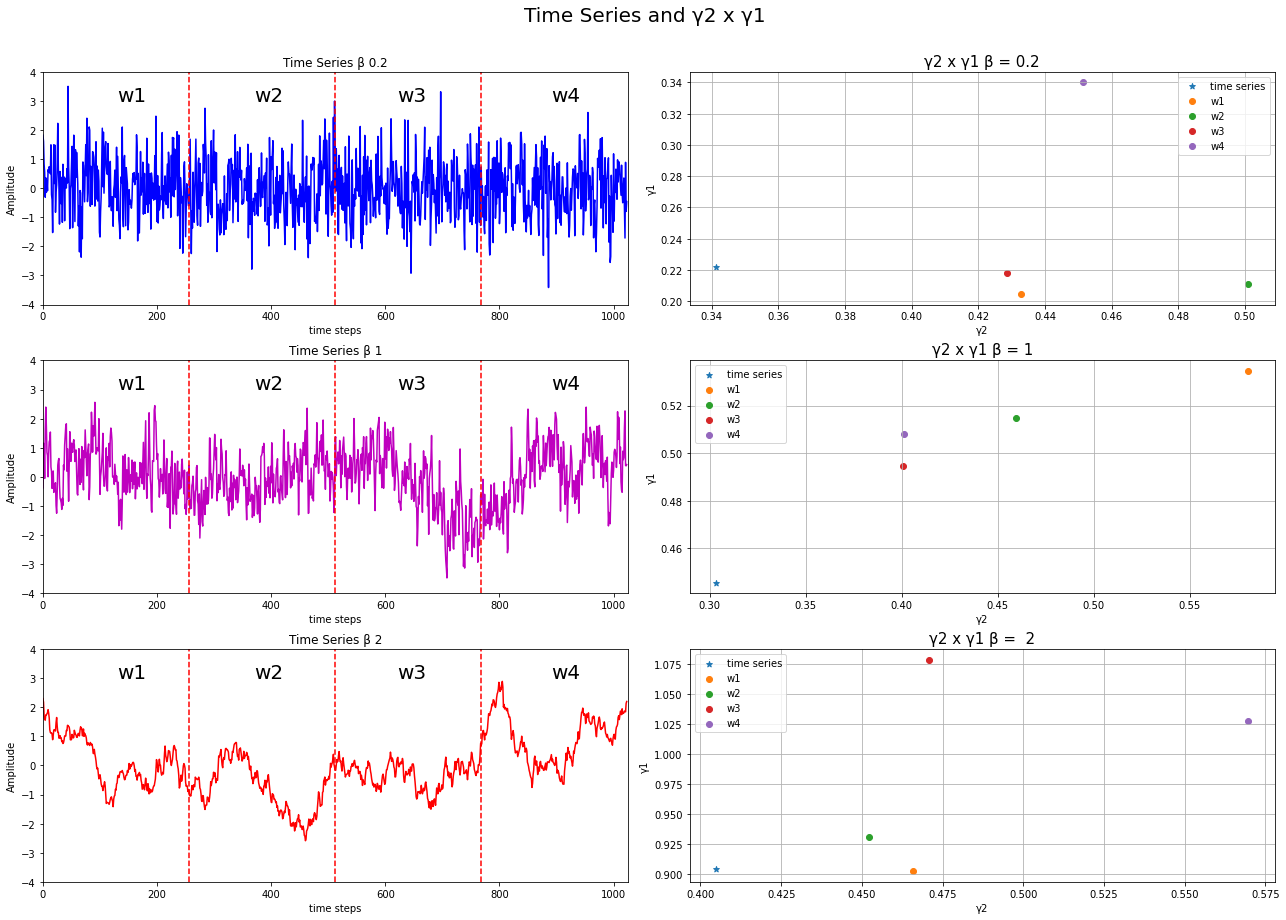

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(18,13)) #rows = 2, cols = 2

plot_each_Series_windows(axs[0][0],serie_b_02, "b", "Time Series β 0.2")
gamma_window(axs[0][1], serie_b_02_gamma1_W, serie_b_02_gamma2_W, "0.2", gamma2[0], gamma1[0])

plot_each_Series_windows(axs[1][0],serie_b_1, "m", "Time Series β 1")
gamma_window(axs[1][1], serie_b_1_gamma1_W, serie_b_1_gamma2_W, "1", gamma2[1], gamma1[1])

plot_each_Series_windows(axs[2][0],serie_b_2, "r", "Time Series β 2")
gamma_window(axs[2][1], serie_b_2_gamma1_W, serie_b_2_gamma2_W, " 2", gamma2[2], gamma1[2])

fig.suptitle("Time Series and γ2 x γ1", size=20)

fig.tight_layout()
fig.subplots_adjust(top=0.91)

plt.show()